In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


In [ ]:
# Set visualization style for accessibility (viridis palette is colorblind-friendly)
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 1. Data Loading and Exploration
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, delimiter=";")
print("Dataset shape:", wine_df.shape)
print("Dataset preview:")
wine_df.head()

Dataset shape: (1599, 12)
Dataset preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print("\nMissing values per column:")
print(wine_df.isnull().sum())



Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
print("\nStatistical Summary:")
wine_df.describe()


Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# 2. Creating a Binary Target Variable
# Define wine as "good" if quality >= 6, else "bad"
wine_df['good_quality'] = (wine_df['quality'] >= 6).astype(int)
print("\nGood Quality distribution:")
wine_df['good_quality'].value_counts()


Good Quality distribution:


,count
good_quality,
1,855
0,744


In [ ]:
# Drop the original 'quality' column as it is now replaced by our binary target.
wine_df = wine_df.drop(columns=['quality'])
print("\nColumns after transformation:")
print(wine_df.columns)


Columns after transformation:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good_quality'],
      dtype='object')


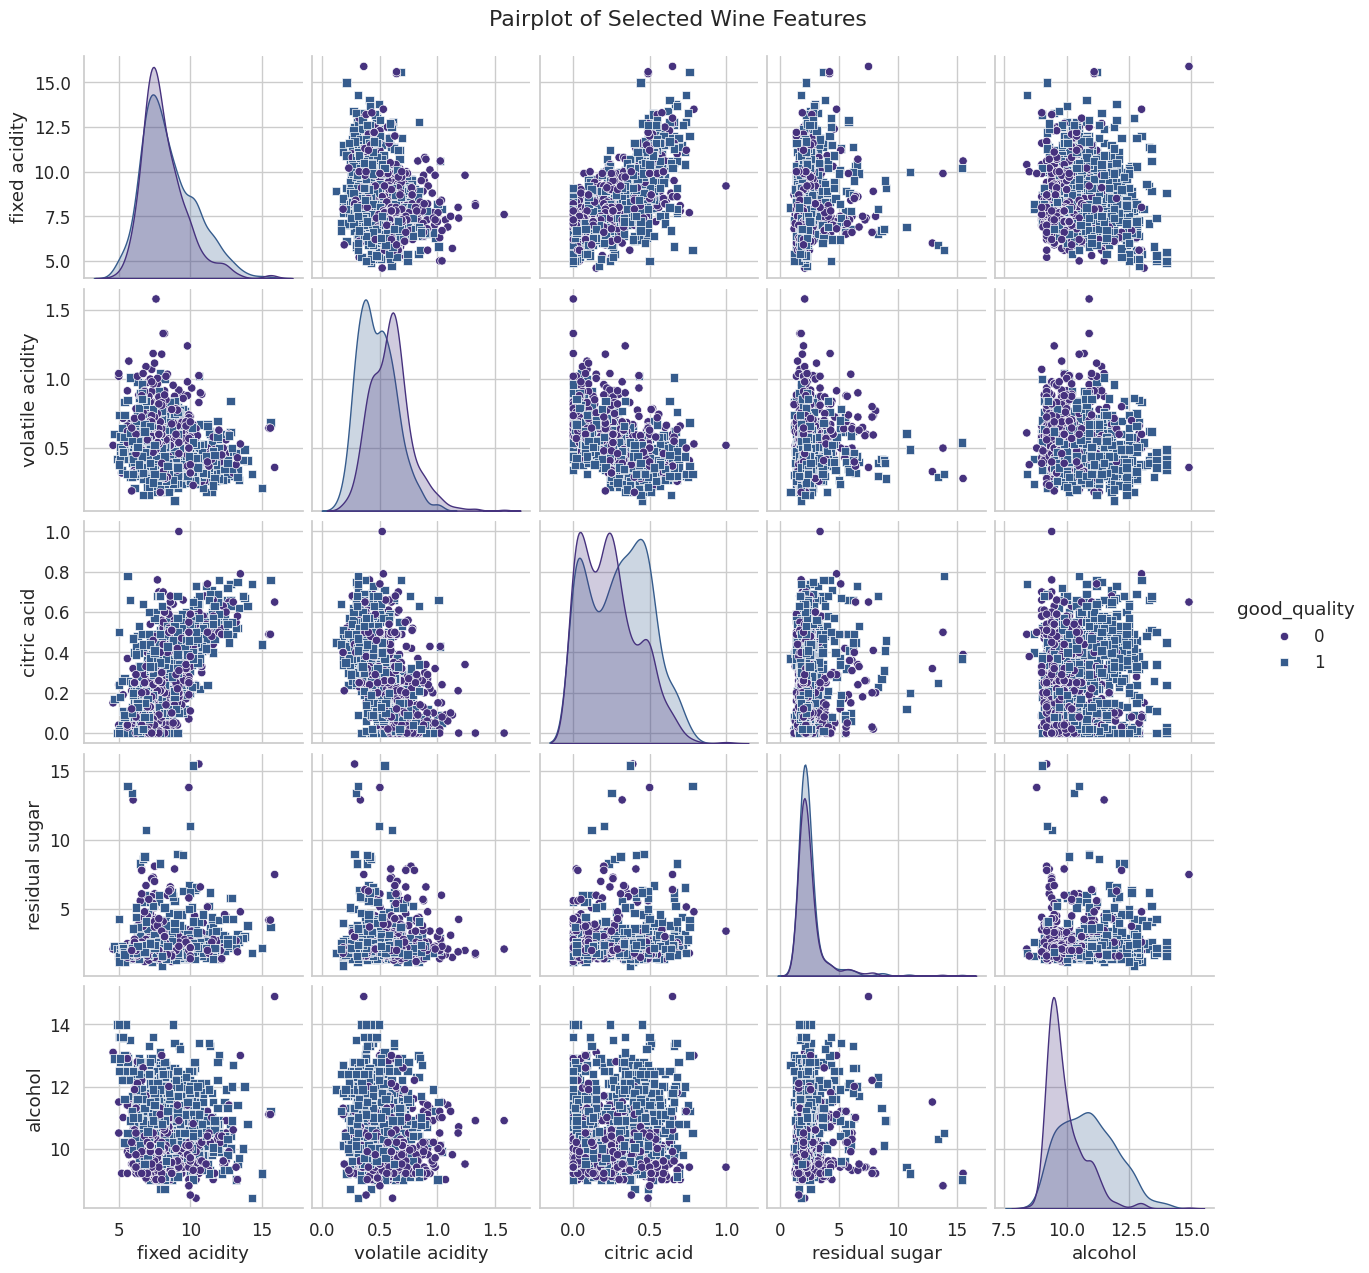

In [ ]:
# 3. Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships among selected features, colored by wine quality
subset_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol', 'good_quality']
sns.pairplot(wine_df[subset_features], hue='good_quality', markers=["o", "s"])
plt.suptitle("Pairplot of Selected Wine Features", y=1.02)
plt.show()

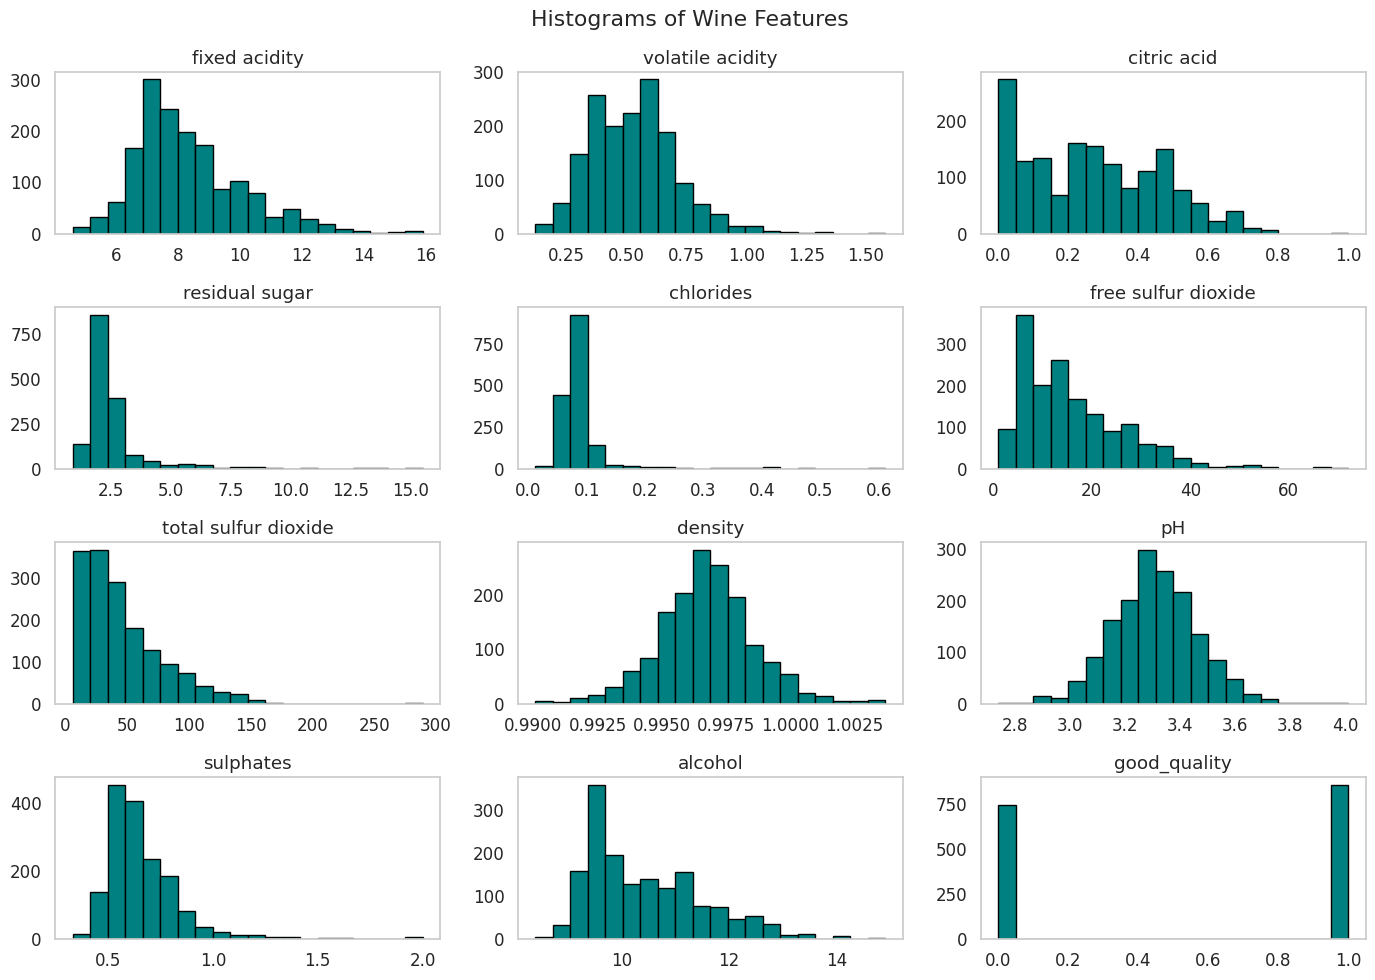

In [ ]:
# Histograms for all features to understand distributions
wine_df.hist(bins=20, color="teal", edgecolor="black", grid=False, figsize=(14,10))
plt.suptitle("Histograms of Wine Features")
plt.tight_layout()
plt.show()


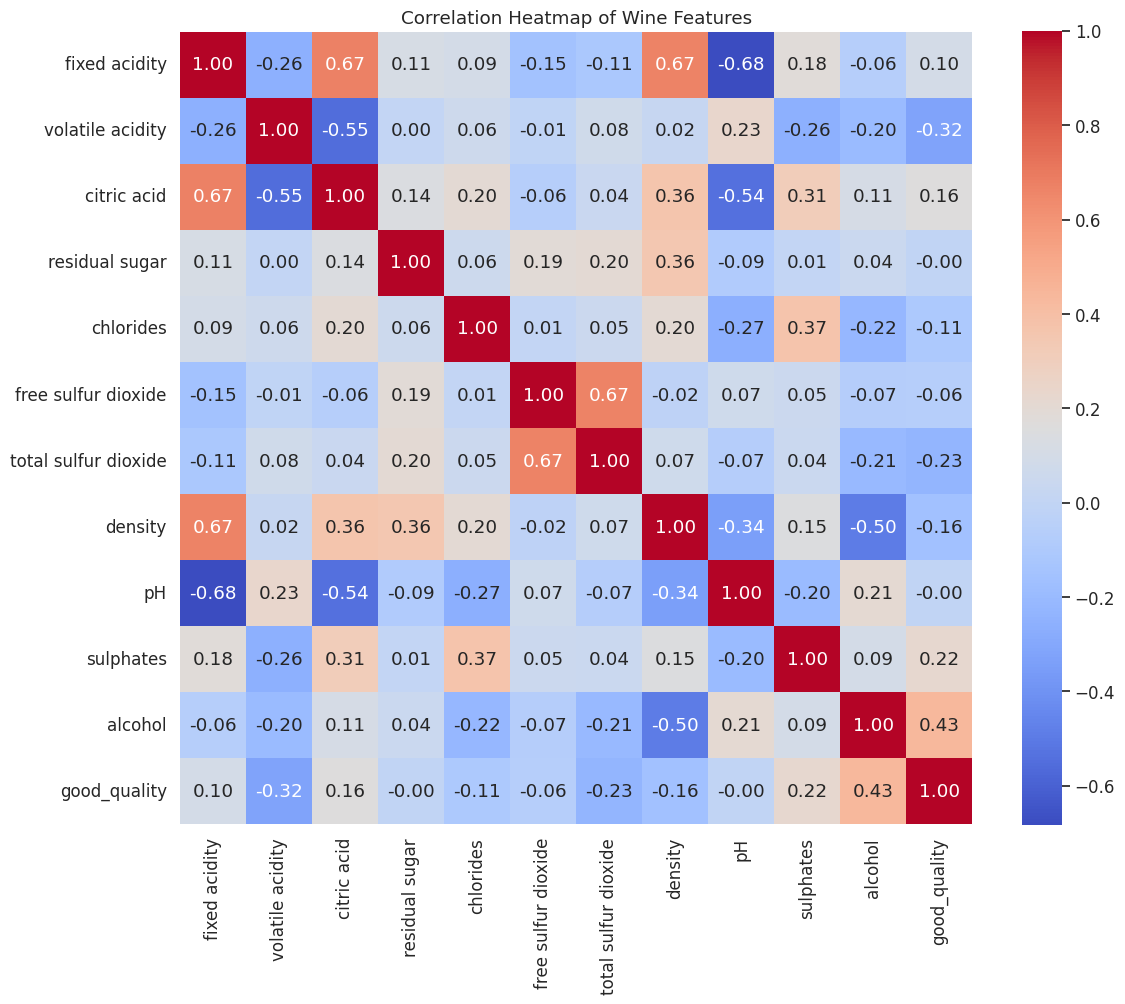

In [ ]:
# Correlation heatmap to identify relationships among features
plt.figure(figsize=(12,10))
corr = wine_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Wine Features")
plt.tight_layout()
plt.show()


In [ ]:
# 4. Train-Test Split
X = wine_df.drop(columns=['good_quality'])
y = wine_df['good_quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 1279
Test set size: 320


In [ ]:
# 5. Model Training: Random Forest Classifier with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)



Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8108057598039216


In [ ]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# %% [code]
# 6. Model Evaluation
y_pred = best_rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       149
           1       0.84      0.81      0.82       171

    accuracy                           0.82       320
   macro avg       0.81      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[122  27]
 [ 32 139]]


In [ ]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.906


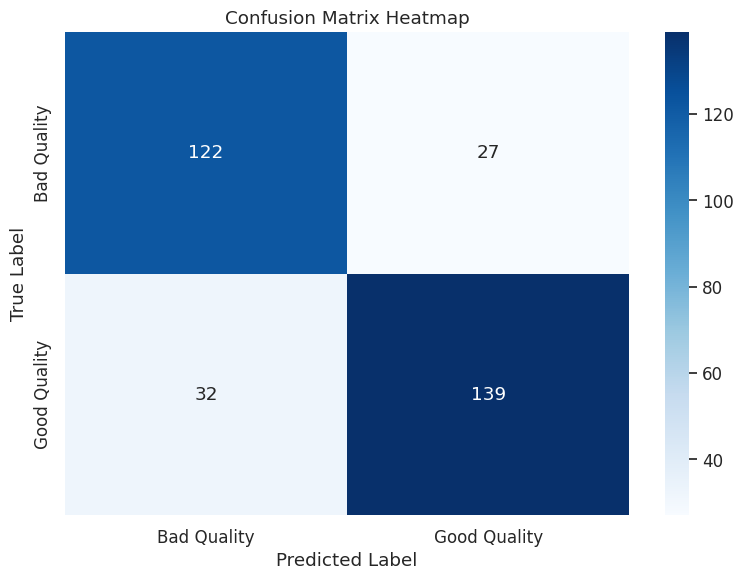

In [ ]:
# 7.1 Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Bad Quality", "Good Quality"],
            yticklabels=["Bad Quality", "Good Quality"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

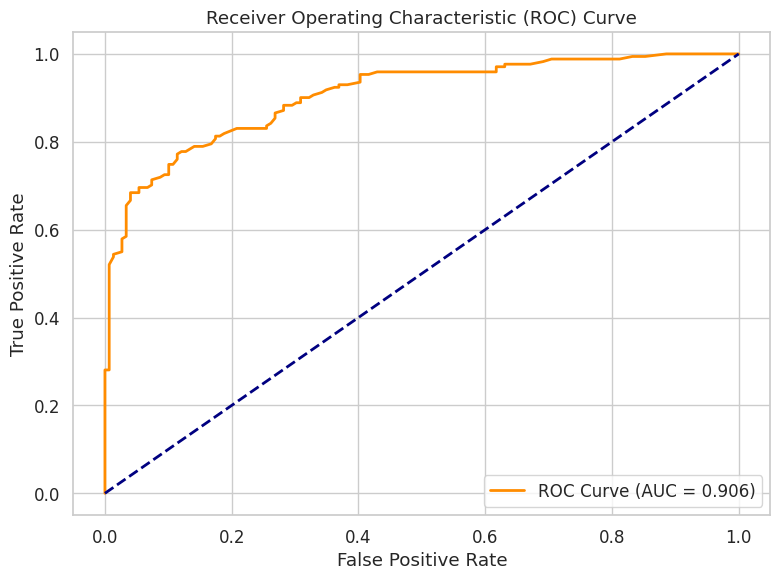

In [ ]:
# 7.2 ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
# 7.3 Feature Importance Plot
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

<ipython-input-24-b911dc6f5a59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


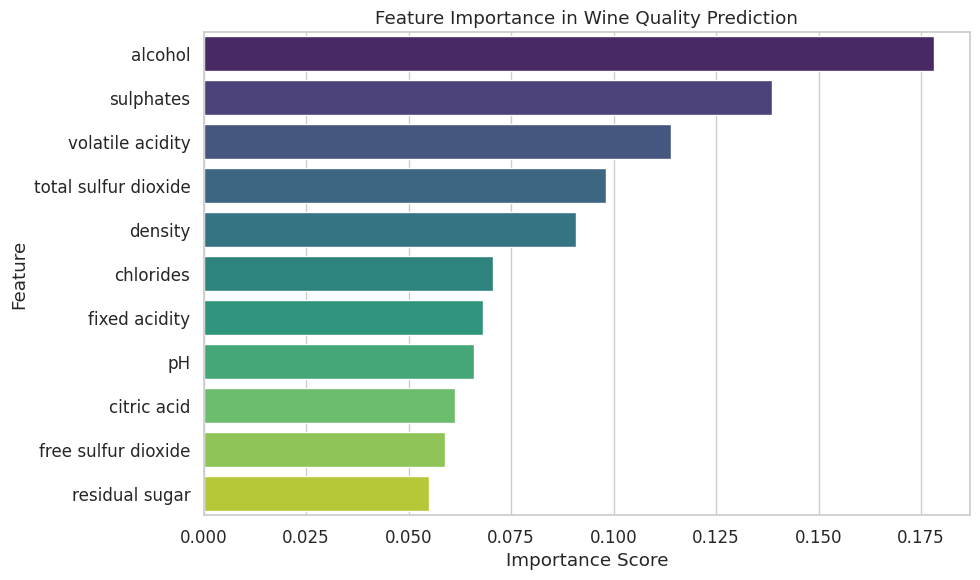

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance in Wine Quality Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

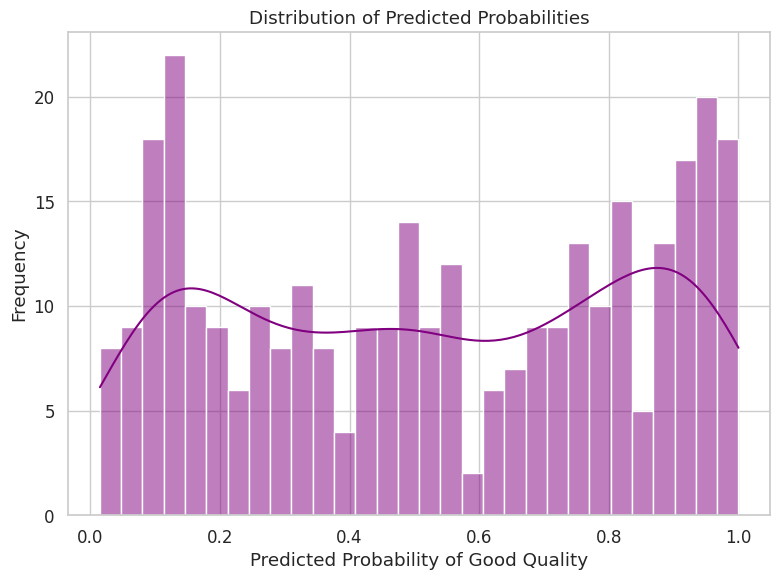

In [ ]:
# 7.4 Predicted Probability Distribution
plt.figure(figsize=(8,6))
sns.histplot(y_pred_proba, bins=30, kde=True, color="purple")
plt.xlabel("Predicted Probability of Good Quality")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.tight_layout()
plt.show()